1. Input points 

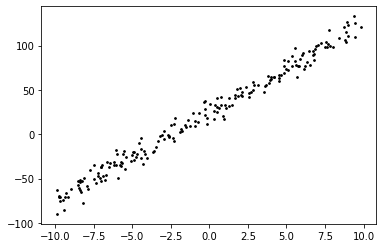

In [237]:
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x = data[:, 0]
y = data[:, 1]
plt.scatter(x, y, color='k',s=3)
plt.show()

2. linear regression result

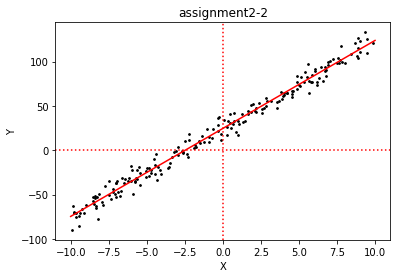

9.93179066821221 24.72264340657078


In [238]:
theta = np.random.randn(1,2)
obj = []
a= []
b= []
for i in range(700):
    a.append(theta[0,0])
    b.append(theta[0,1])
    y_pred=theta[0,0]*x+theta[0,1]
    obj.append((1/(2*len(x)))*(np.sum((y_pred-y)**2)))
    theta[0,0]= theta[0,0]-(0.007/200)*(np.sum((y_pred-y)*x))
    theta[0,1]= theta[0,1]-(0.007/200)*(np.sum((y_pred-y)))

plt.axvline(x=0, color = 'r',linestyle=':')
plt.axhline(y=0, color = 'r',linestyle=':')
plt.title("assignment2-2")
plt.xlabel('X')
plt.ylabel('Y')
t1 = np.arange(-10.0, 10.0, 0.01)
plt.scatter(x,y,color='k',s=3)
plt.plot(t1,theta[0,0]*t1+theta[0,1],color='r')
plt.show()

print(theta[0,0],theta[0,1])

3. Plot the energy surface

In [239]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [240]:
th1= np.arange(-30, 30, 0.1)
th0 = np.arange(-30, 30, 0.1)
th0, th1 = np.meshgrid(th0, th1)

In [241]:
cost = np.zeros((600,600))
for i in range(600):
    for j in range(600):
        cost[i][j]= (1/(2*len(x)))*np.sum((th0[i][j]+th1[i][j]*x-y)**2)

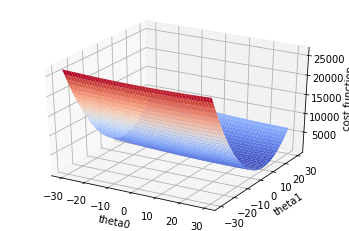

In [242]:
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(th0, th1, cost, cmap=cm.coolwarm)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('cost function')
plt.show()

cost fuction이 theta0축이 상대적으로 optimize되었는지 잘 확인이 안되어 범위를 바꿔서 다시 그려보았습니다

In [243]:
th1= np.arange(-60, 60, 0.2)
th0 = np.arange(-300, 300, 1)
th0, th1 = np.meshgrid(th0, th1)
cost = np.zeros((600,600))
for i in range(600):
    for j in range(600):
        cost[i][j]= (1/(2*len(x)))*np.sum((th0[i][j]+th1[i][j]*x-y)**2)

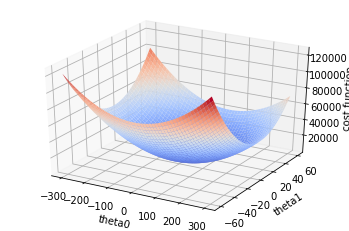

In [244]:
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(th0, th1, cost, cmap=cm.coolwarm)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('cost function')
plt.show()

위그래프가 더 covex함을 직관적으로 알 수 있습니다.

4. Plot the gradient descent path on the energy surface

In [245]:
th1= np.arange(-30, 30, 0.1)
th0 = np.arange(-30, 30, 0.1)
th0, th1 = np.meshgrid(th0, th1)
cost = np.zeros((600,600))
for i in range(600):
    for j in range(600):
        cost[i][j]= (1/(2*len(x)))*np.sum((th0[i][j]+th1[i][j]*x-y)**2)

In [246]:
theta = np.array([[-30,-30]])
obj = []
a= []
b= []
for i in range(700):
    a.append(theta[0,0])
    b.append(theta[0,1])
    y_pred=theta[0,0]*x+theta[0,1]
    obj.append((1/(2*len(x)))*(np.sum((y_pred-y)**2)))
    theta[0,0]= theta[0,0]-(0.007/200)*(np.sum((y_pred-y)*x))
    theta[0,1]= theta[0,1]-(0.007/200)*(np.sum((y_pred-y)))


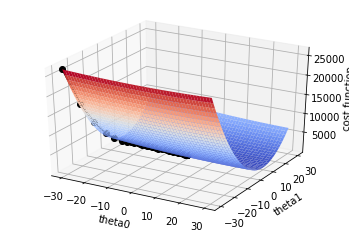

In [248]:
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(th0, th1, cost, cmap=cm.coolwarm)
surf = ax.plot(b, a, obj, color='k',marker='o')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('cost function')
plt.show()

아래 그래프는 theta1=-30,theta0=-30일때 gradient descent path만 나타낸 그래프입니다

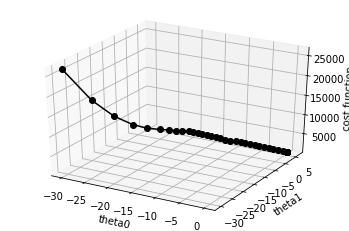

In [249]:
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot(b, a, obj, color='k',marker='o')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('cost function')
plt.show()

아래코드는 theta1이 [-60,60],theta0이 [-300,300]일때 theta1,theta0의 초기값이 각각 60,-300일때 그래프와 gradient descent path

In [250]:
th1= np.arange(-60, 60, 0.2)
th0 = np.arange(-300, 300, 1)
th0, th1 = np.meshgrid(th0, th1)
cost = np.zeros((600,600))
for i in range(600):
    for j in range(600):
        cost[i][j]= (1/(2*len(x)))*np.sum((th0[i][j]+th1[i][j]*x-y)**2)
        
theta = np.array([[60,-300]])
obj = []
a= []
b= []
for i in range(700):
    a.append(theta[0,0])
    b.append(theta[0,1])
    y_pred=theta[0,0]*x+theta[0,1]
    obj.append((1/(2*len(x)))*(np.sum((y_pred-y)**2)))
    theta[0,0]= theta[0,0]-(0.007/200)*(np.sum((y_pred-y)*x))
    theta[0,1]= theta[0,1]-(0.007/200)*(np.sum((y_pred-y)))

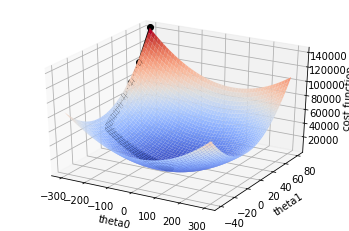

In [251]:
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot(b, a, obj,color='k',marker='o')
surf = ax.plot_surface(th0, th1, cost, cmap=cm.coolwarm)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('cost function')
plt.show()

위 그래프의 gradient descent path만 나타낸 그래프

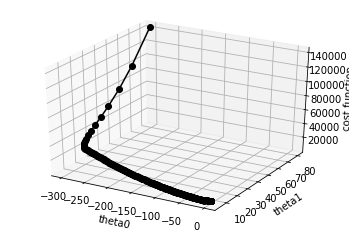

In [252]:
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot(b, a, obj,marker='o',color='k')

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('cost function')
plt.show()

In [2]:
print("1111")

1111
